In [54]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

In [55]:
# Load dataset
df = pd.read_csv("Dataset\\disease_outbreak_data.csv") # Replace with actual path to the data
df.head()

,region_id,region_type,population_density,median_income,elderly_percentage,child_percentage,hospitals_per_100k,vaccination_rate,healthcare_accessibility_score,avg_temperature,...,annual_rainfall,air_quality_index,disease_incidents_last_year,outbreak_frequency_5years,avg_outbreak_duration,daily_commuter_percentage,international_travel_freq,public_transport_usage,risk_score,outbreak_risk_category
0,0,Suburban,1926.071460,59715.328072,13.120373,16.559945,1.587125,0.773235,0.700558,27.615149,...,530.876741,146.389182,111,4,22.349630,44.466126,0.134625,11.383746,38.671740,Medium Risk
1,1,Suburban,1099.791458,46234.340479,22.367720,18.824620,2.974846,0.693353,0.829970,19.180664,...,1175.748878,31.591795,121,9,16.092275,23.906885,3.452742,36.409150,38.168486,Medium Risk
2,2,Urban,5961.415281,62338.173682,16.234222,20.200680,3.866776,0.686971,0.884792,13.895782,...,1909.248412,137.379282,103,7,21.408879,40.833370,4.809743,60.672031,54.447595,Medium Risk
3,3,Rural,274.449145,56912.244502,22.140685,17.759992,0.796274,0.533053,0.407818,20.429617,...,1092.322277,65.218581,106,4,28.526018,46.043081,4.583302,61.002315,45.836201,Medium Risk
4,4,Suburban,643.115175,72034.119281,23.318447,20.912978,1.912083,0.712249,0.591463,14.380508,...,1773.370736,116.607543,92,8,24.213258,24.435633,2.252749,22.103152,48.289559,Medium Risk


In [56]:
print("Number of observations:", df.shape[0])
print("Number of variables:", df.shape[1])
print("Column names:", df.columns.tolist())

Number of observations: 10000
Number of variables: 21
Column names: ['region_id', 'region_type', 'population_density', 'median_income', 'elderly_percentage', 'child_percentage', 'hospitals_per_100k', 'vaccination_rate', 'healthcare_accessibility_score', 'avg_temperature', 'avg_humidity', 'annual_rainfall', 'air_quality_index', 'disease_incidents_last_year', 'outbreak_frequency_5years', 'avg_outbreak_duration', 'daily_commuter_percentage', 'international_travel_freq', 'public_transport_usage', 'risk_score', 'outbreak_risk_category']


In [57]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   region_id                       10000 non-null  int64  
 1   region_type                     10000 non-null  object 
 2   population_density              10000 non-null  float64
 3   median_income                   10000 non-null  float64
 4   elderly_percentage              10000 non-null  float64
 5   child_percentage                10000 non-null  float64
 6   hospitals_per_100k              10000 non-null  float64
 7   vaccination_rate                9500 non-null   float64
 8   healthcare_accessibility_score  9500 non-null   float64
 9   avg_temperature                 10000 non-null  float64
 10  avg_humidity                    10000 non-null  float64
 11  annual_rainfall                 10000 non-null  float64
 12  air_quality_index               1

In [58]:
# Numeric summary
print(df.describe())

# Categorical summary
categorical_columns = df.select_dtypes(include='object').columns
for col in categorical_columns:
    print(f"Unique values in {col}:\n", df[col].value_counts(), "\n")


         region_id  population_density  median_income  elderly_percentage  \
count  10000.00000        10000.000000   10000.000000        10000.000000   
mean    4999.50000         2337.010334   50004.480004           19.986703   
std     2886.89568         2698.714304   14946.162315            5.748790   
min        0.00000           10.512790   -2212.132431           10.001741   
25%     2499.75000          415.723982   39891.924162           14.945894   
50%     4999.50000         1246.776591   50036.432960           20.051986   
75%     7499.25000         3170.513079   60030.092037           24.964998   
max     9999.00000         9999.345031  103997.175535           29.999443   

       child_percentage  hospitals_per_100k  vaccination_rate  \
count      10000.000000        10000.000000       9500.000000   
mean          19.992744            2.318897          0.684862   
std            2.912762            1.179840          0.083166   
min           15.000596            0.500505   

In [59]:
# Impute missing numeric values with median and categorical values with the most frequent value
numeric_cols = df.select_dtypes(include=np.number).columns
categorical_cols = df.select_dtypes(include='object').columns

# Median imputation for numeric columns
numeric_imputer = SimpleImputer(strategy='median')
df[numeric_cols] = numeric_imputer.fit_transform(df[numeric_cols])

# Mode imputation for categorical columns
categorical_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = categorical_imputer.fit_transform(df[categorical_cols])

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   region_id                       10000 non-null  float64
 1   region_type                     10000 non-null  object 
 2   population_density              10000 non-null  float64
 3   median_income                   10000 non-null  float64
 4   elderly_percentage              10000 non-null  float64
 5   child_percentage                10000 non-null  float64
 6   hospitals_per_100k              10000 non-null  float64
 7   vaccination_rate                10000 non-null  float64
 8   healthcare_accessibility_score  10000 non-null  float64
 9   avg_temperature                 10000 non-null  float64
 10  avg_humidity                    10000 non-null  float64
 11  annual_rainfall                 10000 non-null  float64
 12  air_quality_index               1

In [60]:
df.describe()

,region_id,population_density,median_income,elderly_percentage,child_percentage,hospitals_per_100k,vaccination_rate,healthcare_accessibility_score,avg_temperature,avg_humidity,annual_rainfall,air_quality_index,disease_incidents_last_year,outbreak_frequency_5years,avg_outbreak_duration,daily_commuter_percentage,international_travel_freq,public_transport_usage,risk_score
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4999.50000,2337.010334,50004.480004,19.986703,19.992744,2.318897,0.684879,0.649211,20.030658,54.908115,1249.046390,93.641935,100.00950,4.545500,20.090058,39.807531,2.579044,40.282015,40.384984
std,2886.89568,2698.714304,14946.162315,5.748790,2.912762,1.179840,0.081060,0.140589,5.021779,14.509813,431.397968,47.347796,9.90823,2.862298,5.775056,11.571614,1.408516,17.377852,6.455889
min,0.00000,10.512790,-2212.132431,10.001741,15.000596,0.500505,0.500054,0.400002,-2.392611,30.004029,500.220255,30.007255,67.00000,0.000000,10.002047,20.000437,0.100236,10.001096,18.583134
25%,2499.75000,415.723982,39891.924162,14.945894,17.431408,1.326393,0.631936,0.532109,16.682859,42.321885,873.380216,61.417701,93.00000,2.000000,15.063081,29.779807,1.363178,25.331869,35.904735
50%,4999.50000,1246.776591,50036.432960,20.051986,20.017963,2.221535,0.685192,0.649733,20.050585,54.836348,1251.678364,91.389965,100.00000,5.000000,20.158222,39.790315,2.604635,40.365444,40.387202
75%,7499.25000,3170.513079,60030.092037,24.964998,22.523553,2.962281,0.746491,0.766679,23.436533,67.400403,1619.240743,121.346298,107.00000,7.000000,25.048451,49.708474,3.784775,55.337298,44.827703
max,9999.00000,9999.345031,103997.175535,29.999443,24.999397,4.999559,0.849943,0.899946,42.395421,79.996241,1999.851466,499.012416,137.00000,9.000000,29.999519,59.996852,4.999382,69.985134,63.330185


In [61]:
data = df

In [62]:
import numpy as np

# Create derived features
data['temperature_deviation'] = data['avg_temperature'] - data['avg_temperature'].mean()
data['humidity_deviation'] = data['avg_humidity'] - data['avg_humidity'].mean()
data['population_density_log'] = np.log1p(data['population_density'])  # Logarithmic scaling
data['non_vaccinated_rate'] = 1 - data['vaccination_rate']

In [63]:
data['region_type_encoded'] = df['region_type'].map({'Suburban': 0, 'Rural': 1, 'Urban': 2})
data['outbreak_risk_category_encoded'] = df['outbreak_risk_category'].map({'Medium Risk': 0, 'High Risk': 1, 'Low Risk': 2})


# Optional: Drop original categorical columns if no longer needed
data = data.drop(columns=['region_type', 'outbreak_risk_category'])

In [64]:
data

,region_id,population_density,median_income,elderly_percentage,child_percentage,hospitals_per_100k,vaccination_rate,healthcare_accessibility_score,avg_temperature,avg_humidity,...,daily_commuter_percentage,international_travel_freq,public_transport_usage,risk_score,temperature_deviation,humidity_deviation,population_density_log,non_vaccinated_rate,region_type_encoded,outbreak_risk_category_encoded
0,0.0,1926.071460,59715.328072,13.120373,16.559945,1.587125,0.773235,0.700558,27.615149,65.403629,...,44.466126,0.134625,11.383746,38.671740,7.584491,10.495514,7.563757,0.226765,0,0
1,1.0,1099.791458,46234.340479,22.367720,18.824620,2.974846,0.693353,0.829970,19.180664,64.015377,...,23.906885,3.452742,36.409150,38.168486,-0.849994,9.107262,7.003785,0.306647,0,0
2,2.0,5961.415281,62338.173682,16.234222,20.200680,3.866776,0.686971,0.884792,13.895782,68.756641,...,40.833370,4.809743,60.672031,54.447595,-6.134876,13.848527,8.693231,0.313029,2,0
3,3.0,274.449145,56912.244502,22.140685,17.759992,0.796274,0.533053,0.407818,20.429617,51.170074,...,46.043081,4.583302,61.002315,45.836201,0.398959,-3.738041,5.618403,0.466947,1,0
4,4.0,643.115175,72034.119281,23.318447,20.912978,1.912083,0.712249,0.591463,14.380508,78.585605,...,24.435633,2.252749,22.103152,48.289559,-5.650150,23.677490,6.467878,0.287751,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995.0,604.578638,69777.578677,20.999746,21.117776,2.285226,0.605561,0.573275,19.048404,61.915302,...,32.928318,3.017903,11.411833,47.611524,-0.982254,7.007188,6.406184,0.394439,0,0
9996,9996.0,1742.541805,32361.655154,10.700479,19.267828,2.076407,0.716746,0.691871,17.007391,48.275108,...,55.865822,4.279763,39.368211,42.864102,-3.023267,-6.633007,7.463674,0.283254,0,0
9997,9997.0,409.219976,44412.254477,10.307170,16.860258,0.808470,0.663049,0.793505,8.054553,31.444640,...,54.270234,0.895611,37.706296,39.190095,-11.976105,-23.463474,6.016694,0.336951,1,0
9998,9998.0,130.823003,43109.431704,26.163805,19.647374,0.966565,0.685192,0.805805,15.315754,39.149596,...,51.361708,2.638970,17.599249,34.986515,-4.714904,-15.758519,4.881460,0.314808,1,0


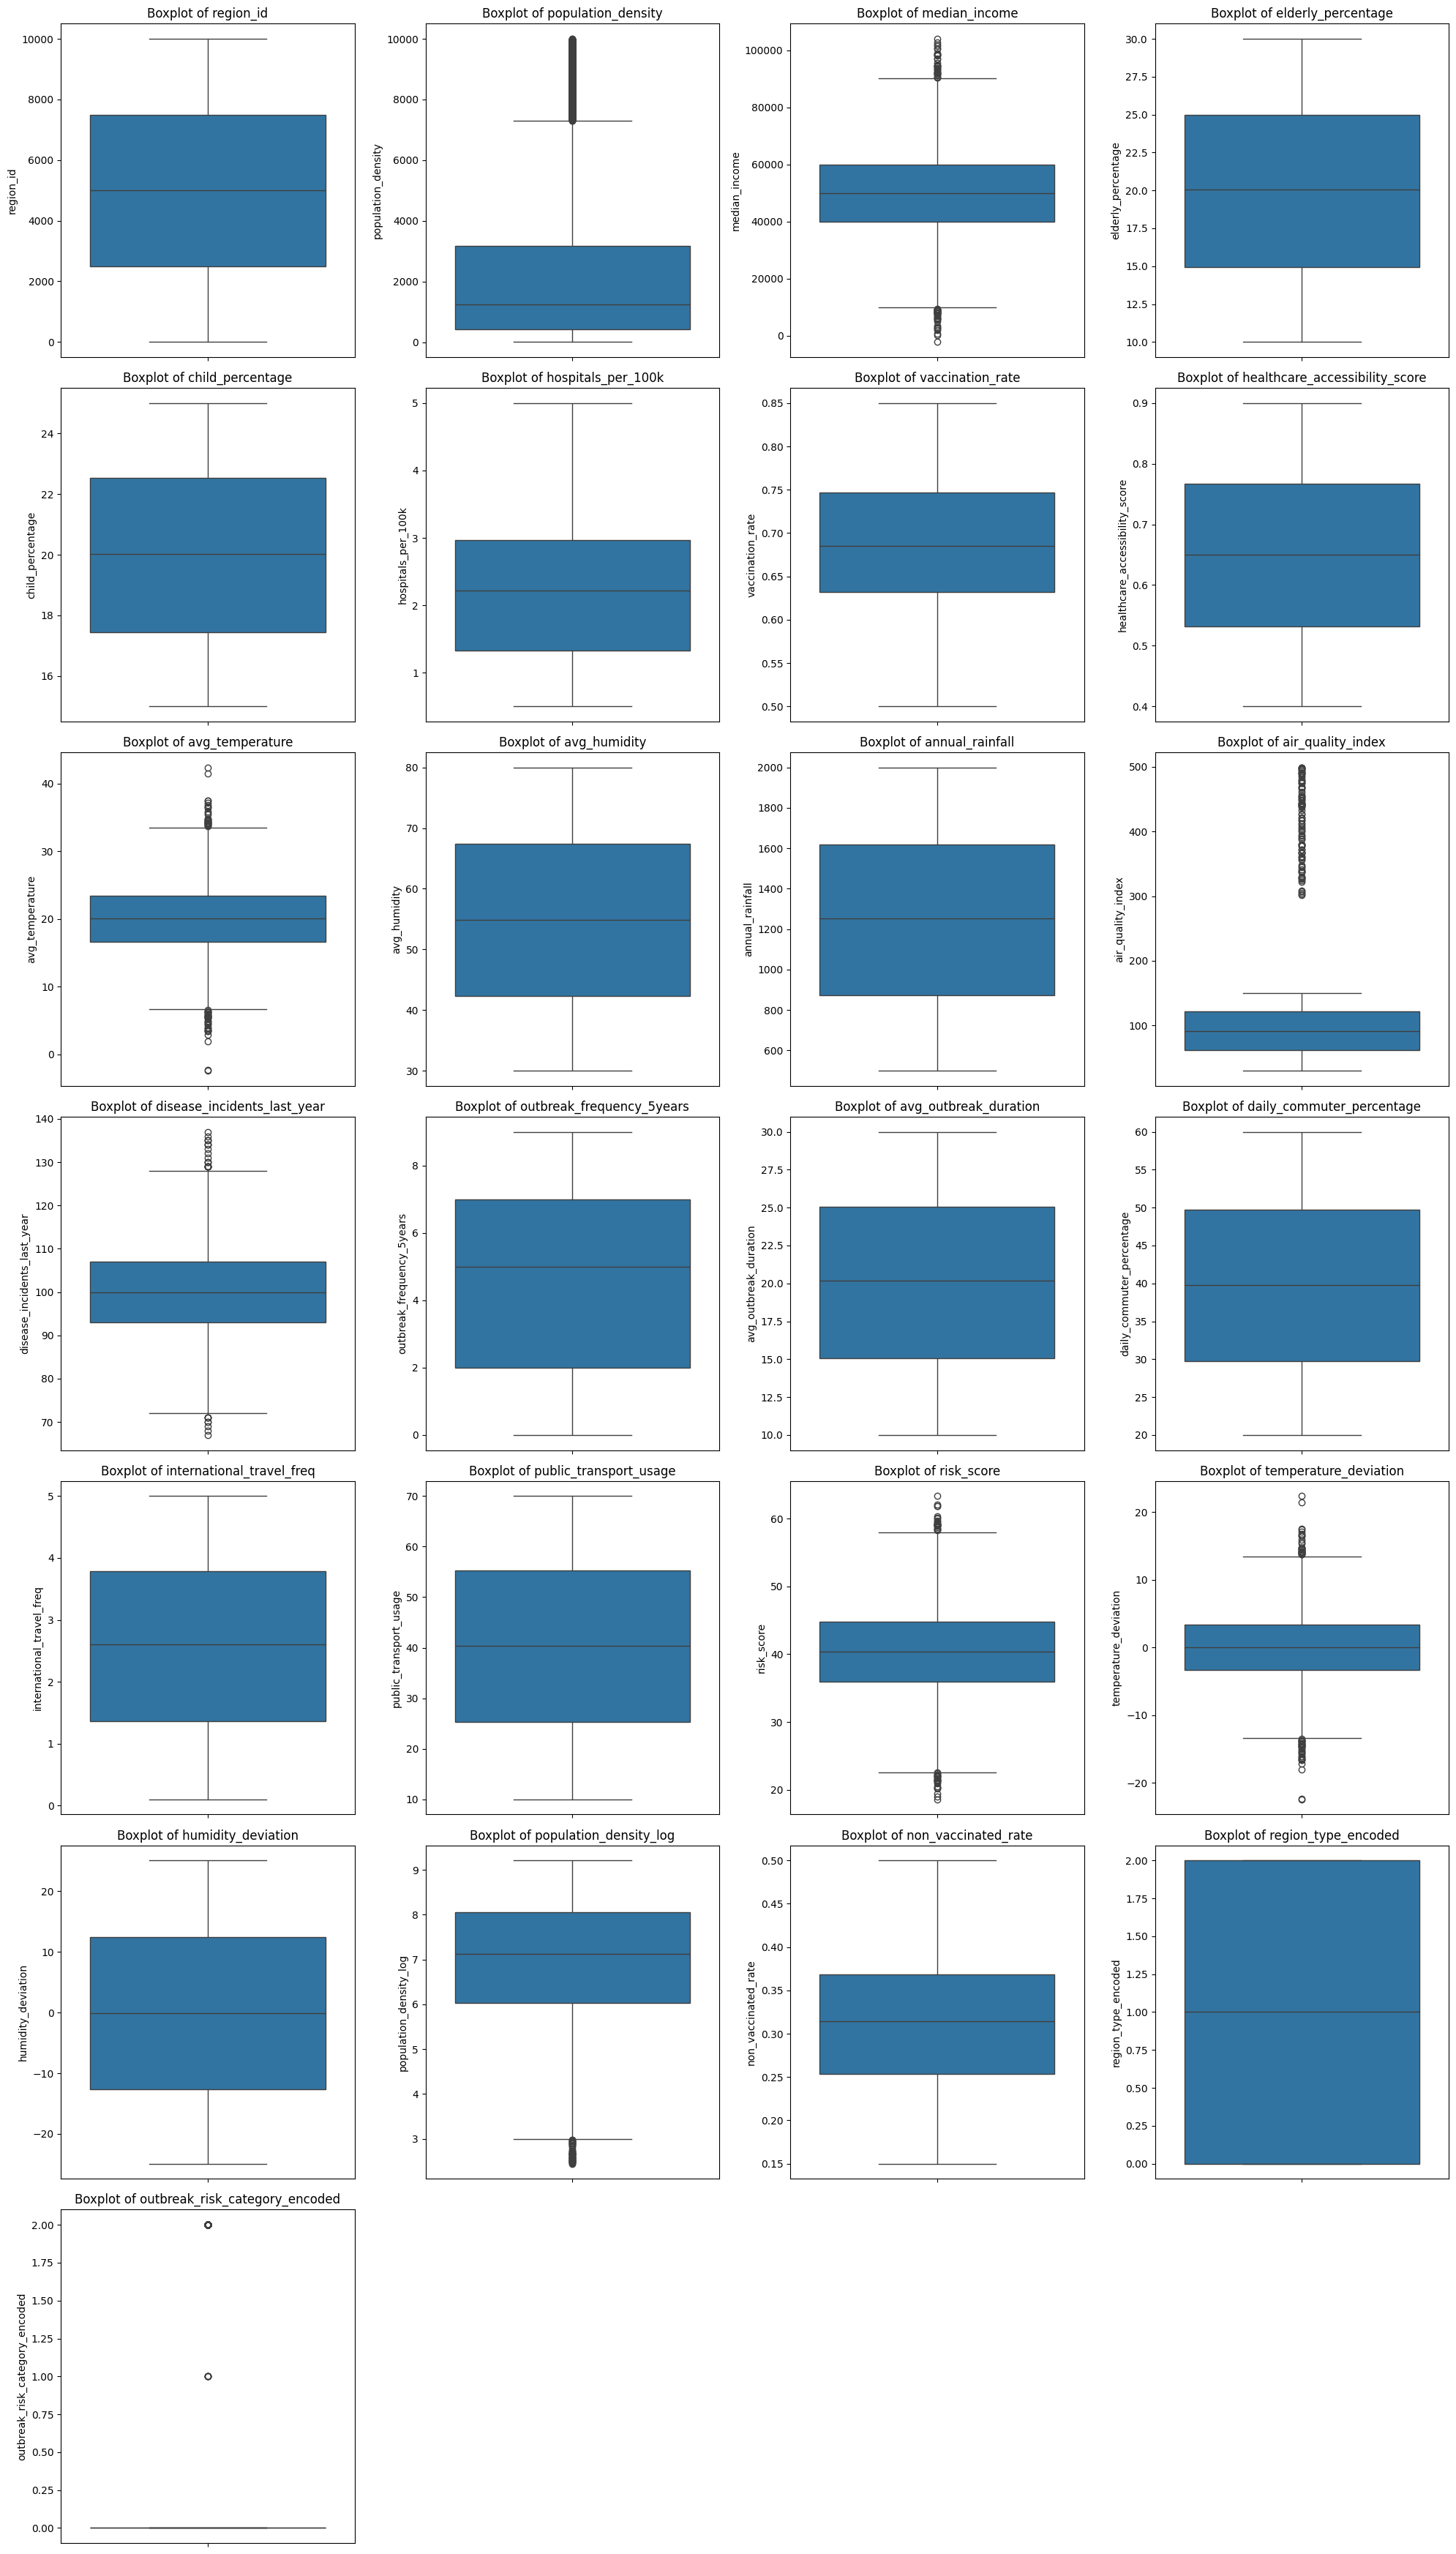

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt
import math

# Filter numerical columns
numerical_columns = [col for col in data.columns if data[col].dtype in ['float64', 'int64']]

# Determine the number of rows needed
n_cols = 4  # Number of plots per row
n_rows = math.ceil(len(numerical_columns) / n_cols)

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each column in the subplot
for i, col in enumerate(numerical_columns):
    sns.boxplot(data[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')

# Remove empty subplots (if any)
for i in range(len(numerical_columns), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()
plt.show()


In [66]:
# Example: Remove outliers using IQR (Interquartile Range)
Q1 = data[col].quantile(0.25)
Q3 = data[col].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

filtered_data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

filtered_data.head()


,region_id,population_density,median_income,elderly_percentage,child_percentage,hospitals_per_100k,vaccination_rate,healthcare_accessibility_score,avg_temperature,avg_humidity,...,daily_commuter_percentage,international_travel_freq,public_transport_usage,risk_score,temperature_deviation,humidity_deviation,population_density_log,non_vaccinated_rate,region_type_encoded,outbreak_risk_category_encoded
0,0.0,1926.071460,59715.328072,13.120373,16.559945,1.587125,0.773235,0.700558,27.615149,65.403629,...,44.466126,0.134625,11.383746,38.671740,7.584491,10.495514,7.563757,0.226765,0,0
1,1.0,1099.791458,46234.340479,22.367720,18.824620,2.974846,0.693353,0.829970,19.180664,64.015377,...,23.906885,3.452742,36.409150,38.168486,-0.849994,9.107262,7.003785,0.306647,0,0
2,2.0,5961.415281,62338.173682,16.234222,20.200680,3.866776,0.686971,0.884792,13.895782,68.756641,...,40.833370,4.809743,60.672031,54.447595,-6.134876,13.848527,8.693231,0.313029,2,0
3,3.0,274.449145,56912.244502,22.140685,17.759992,0.796274,0.533053,0.407818,20.429617,51.170074,...,46.043081,4.583302,61.002315,45.836201,0.398959,-3.738041,5.618403,0.466947,1,0
4,4.0,643.115175,72034.119281,23.318447,20.912978,1.912083,0.712249,0.591463,14.380508,78.585605,...,24.435633,2.252749,22.103152,48.289559,-5.650150,23.677490,6.467878,0.287751,0,0


In [67]:
df.describe()

,region_id,population_density,median_income,elderly_percentage,child_percentage,hospitals_per_100k,vaccination_rate,healthcare_accessibility_score,avg_temperature,avg_humidity,...,daily_commuter_percentage,international_travel_freq,public_transport_usage,risk_score,temperature_deviation,humidity_deviation,population_density_log,non_vaccinated_rate,region_type_encoded,outbreak_risk_category_encoded
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000
mean,4999.50000,2337.010334,50004.480004,19.986703,19.992744,2.318897,0.684879,0.649211,20.030658,54.908115,...,39.807531,2.579044,40.282015,40.384984,4.388312e-15,3.774403e-15,6.986784,0.315121,0.889700,0.108300
std,2886.89568,2698.714304,14946.162315,5.748790,2.912762,1.179840,0.081060,0.140589,5.021779,14.509813,...,11.571614,1.408516,17.377852,6.455889,5.021779e+00,1.450981e+01,1.398356,0.081060,0.828977,0.451876
min,0.00000,10.512790,-2212.132431,10.001741,15.000596,0.500505,0.500054,0.400002,-2.392611,30.004029,...,20.000437,0.100236,10.001096,18.583134,-2.242327e+01,-2.490409e+01,2.443459,0.150057,0.000000,0.000000
25%,2499.75000,415.723982,39891.924162,14.945894,17.431408,1.326393,0.631936,0.532109,16.682859,42.321885,...,29.779807,1.363178,25.331869,35.904735,-3.347799e+00,-1.258623e+01,6.032424,0.253509,0.000000,0.000000
50%,4999.50000,1246.776591,50036.432960,20.051986,20.017963,2.221535,0.685192,0.649733,20.050585,54.836348,...,39.790315,2.604635,40.365444,40.387202,1.992653e-02,-7.176702e-02,7.129119,0.314808,1.000000,0.000000
75%,7499.25000,3170.513079,60030.092037,24.964998,22.523553,2.962281,0.746491,0.766679,23.436533,67.400403,...,49.708474,3.784775,55.337298,44.827703,3.405875e+00,1.249229e+01,8.061964,0.368064,2.000000,0.000000
max,9999.00000,9999.345031,103997.175535,29.999443,24.999397,4.999559,0.849943,0.899946,42.395421,79.996241,...,59.996852,4.999382,69.985134,63.330185,2.236476e+01,2.508813e+01,9.210375,0.499946,2.000000,2.000000


In [68]:
filtered_data.describe()

,region_id,population_density,median_income,elderly_percentage,child_percentage,hospitals_per_100k,vaccination_rate,healthcare_accessibility_score,avg_temperature,avg_humidity,...,daily_commuter_percentage,international_travel_freq,public_transport_usage,risk_score,temperature_deviation,humidity_deviation,population_density_log,non_vaccinated_rate,region_type_encoded,outbreak_risk_category_encoded
count,9455.000000,9455.000000,9455.000000,9455.000000,9455.000000,9455.000000,9455.000000,9455.000000,9455.000000,9455.000000,...,9455.000000,9455.000000,9455.000000,9455.000000,9455.000000,9455.000000,9455.000000,9455.000000,9455.000000,9455.0
mean,5004.705235,2321.258492,49999.078655,20.046875,20.006168,2.309346,0.683764,0.645744,20.049021,55.601598,...,40.044901,2.652295,40.796732,41.109444,0.018363,0.693484,6.977521,0.316236,0.887044,0.0
std,2888.334623,2692.819287,14958.522074,5.756112,2.911401,1.177567,0.081064,0.140167,5.092451,14.387401,...,11.569703,1.390885,17.327425,5.771987,5.092451,14.387401,1.397825,0.081064,0.826456,0.0
min,0.000000,10.512790,-2212.132431,10.001741,15.000596,0.500505,0.500054,0.400002,-2.392611,30.004029,...,20.005313,0.100236,10.001096,30.007137,-22.423269,-24.904085,2.443459,0.150057,0.000000,0.0
25%,2512.500000,409.931327,39906.249797,15.020519,17.441522,1.316715,0.630490,0.528753,16.630032,43.391731,...,30.074857,1.485761,25.976169,36.752144,-3.400626,-11.516383,6.018426,0.255163,0.000000,0.0
50%,5014.000000,1235.098234,50048.299118,20.122692,20.034950,2.212588,0.685192,0.649733,20.065046,55.781999,...,40.181536,2.697207,41.205396,40.812744,0.034388,0.873884,7.119715,0.314808,1.000000,0.0
75%,7507.500000,3099.438486,60006.423251,25.052914,22.531636,2.952062,0.744837,0.761704,23.506347,68.041128,...,49.943071,3.842610,55.860542,45.052096,3.475689,13.133014,8.039299,0.369510,2.000000,0.0
max,9999.000000,9999.345031,103997.175535,29.999443,24.999397,4.999559,0.849943,0.899946,42.395421,79.996241,...,59.996852,4.999382,69.985134,59.657432,22.364763,25.088127,9.210375,0.499946,2.000000,0.0


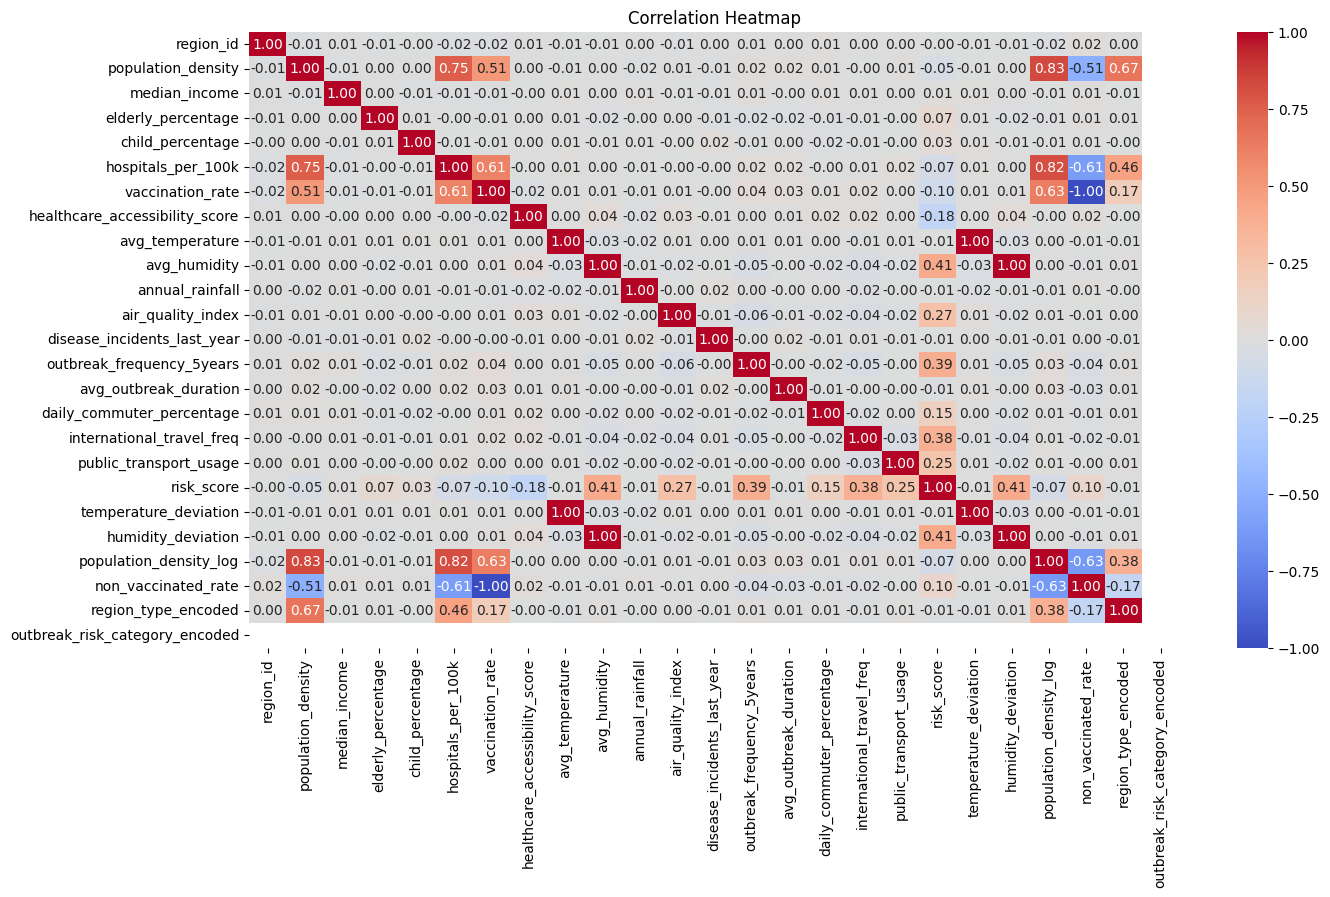

In [69]:
# Correlation heatmap to visualize relationships between variables
correlation_matrix = filtered_data.corr()
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


### Splitting the Data
We will split the data into training and testing sets for both classification (outbreak risk) and clustering tasks.

In [70]:
from sklearn.model_selection import train_test_split

# Define target variable for classification
classification_target = 'outbreak_risk_category_encoded'

# Features and target for classification
X_classification = data.drop(columns=[classification_target])
y_classification = data[classification_target]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_classification, y_classification, test_size=0.2, random_state=42)

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

Training set shape: (8000, 24)
Test set shape: (2000, 24)


### Building the Classification Model
- We will train a classification model to predict the outbreak_risk_category_encoded. For simplicity, let's start with a Random Forest classifier.

In [71]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize Random Forest Classifier
clf = RandomForestClassifier(
    random_state=42,
    max_depth=10,              # Limit tree depth
    min_samples_split=10,      # Minimum samples to split a node
    min_samples_leaf=5,        # Minimum samples at each leaf
    n_estimators=100          # Number of trees
)

# Train the model
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1890
           1       0.00      0.00      0.00         1
           2       1.00      1.00      1.00       109

    accuracy                           1.00      2000
   macro avg       0.67      0.67      0.67      2000
weighted avg       1.00      1.00      1.00      2000

Accuracy: 1.00


C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1890
           1       0.00      0.00      0.00         1
           2       1.00      1.00      1.00       109

    accuracy                           1.00      2000
   macro avg       0.67      0.67      0.67      2000
weighted avg       1.00      1.00      1.00      2000

Random Forest ROC-AUC Score: 1.00


C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

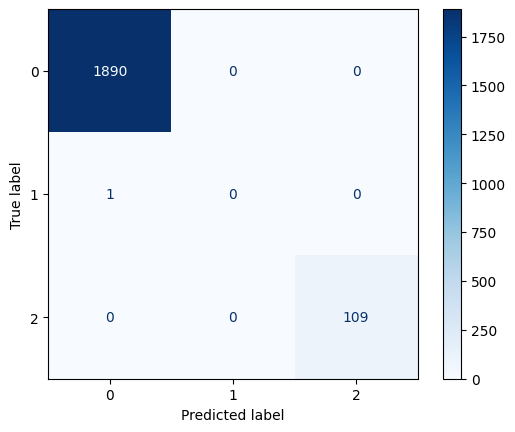

In [72]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, ConfusionMatrixDisplay

# Train Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]  # For ROC-AUC

# Evaluation
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

# ROC-AUC Score
roc_auc_rf = roc_auc_score(y_test, rf_model.predict_proba(X_test), multi_class='ovr')
print(f"Random Forest ROC-AUC Score: {roc_auc_rf:.2f}")

# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(rf_model, X_test, y_test, cmap='Blues')

C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:40:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1890
           1       0.00      0.00      0.00         1
           2       0.99      1.00      1.00       109

    accuracy                           1.00      2000
   macro avg       0.66      0.67      0.66      2000
weighted avg       1.00      1.00      1.00      2000

XGBoost ROC-AUC Score: 1.00


C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

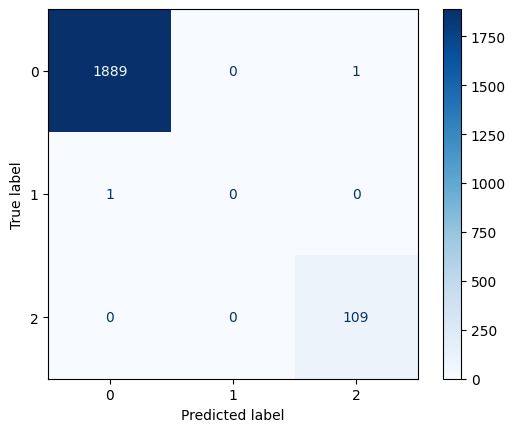

In [73]:
from xgboost import XGBClassifier

# Train XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)
y_pred_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]  # For ROC-AUC

# Evaluation
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))

# ROC-AUC Score
roc_auc_xgb = roc_auc_score(y_test, xgb_model.predict_proba(X_test), multi_class='ovr')
print(f"XGBoost ROC-AUC Score: {roc_auc_xgb:.2f}")

# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(xgb_model, X_test, y_test, cmap='Blues')

Neural Network Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1890
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00       109

    accuracy                           0.94      2000
   macro avg       0.32      0.33      0.32      2000
weighted avg       0.89      0.94      0.92      2000

Neural Network ROC-AUC Score: 0.49


C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

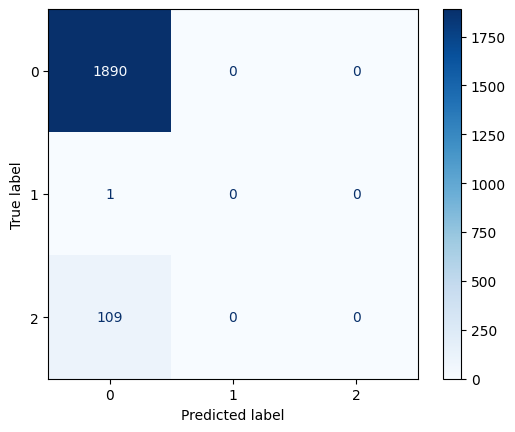

In [74]:
from sklearn.neural_network import MLPClassifier

# Train Neural Network
nn_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
nn_model.fit(X_train, y_train)

# Predictions
y_pred_nn = nn_model.predict(X_test)
y_pred_proba_nn = nn_model.predict_proba(X_test)[:, 1]  # For ROC-AUC

# Evaluation
print("Neural Network Classification Report:")
print(classification_report(y_test, y_pred_nn))

# ROC-AUC Score
roc_auc_nn = roc_auc_score(y_test, nn_model.predict_proba(X_test), multi_class='ovr')
print(f"Neural Network ROC-AUC Score: {roc_auc_nn:.2f}")

# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(nn_model, X_test, y_test, cmap='Blues')


Random Forest Feature Importance:
risk_score                        0.704003
international_travel_freq         0.044386
air_quality_index                 0.041693
avg_humidity                      0.027086
outbreak_frequency_5years         0.027069
humidity_deviation                0.025789
public_transport_usage            0.017105
healthcare_accessibility_score    0.014293
daily_commuter_percentage         0.011109
elderly_percentage                0.007808
avg_temperature                   0.007302
vaccination_rate                  0.007166
child_percentage                  0.006785
non_vaccinated_rate               0.006684
temperature_deviation             0.006514
population_density                0.006098
region_id                         0.006005
population_density_log            0.006004
median_income                     0.005936
hospitals_per_100k                0.005226
annual_rainfall                   0.005161
avg_outbreak_duration             0.005041
disease_incidents_la

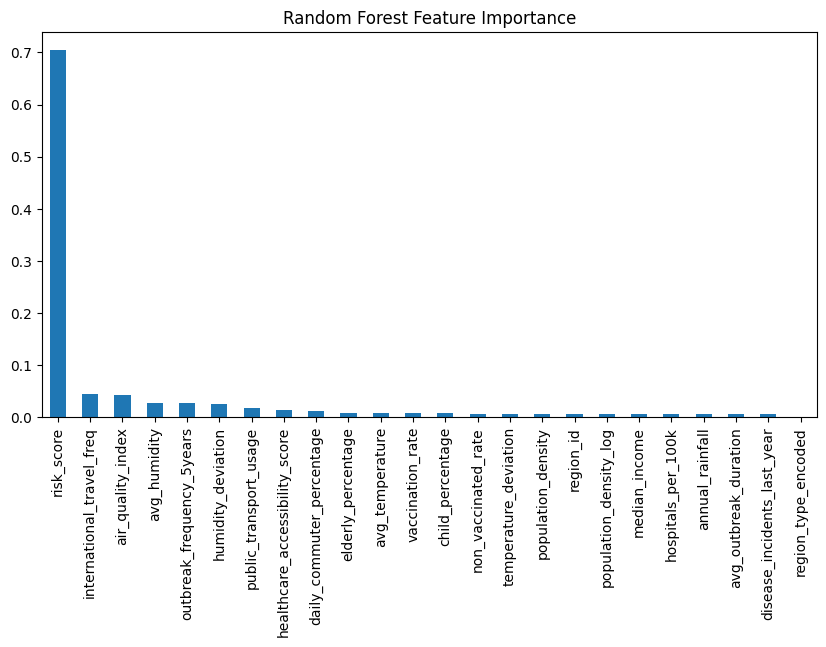

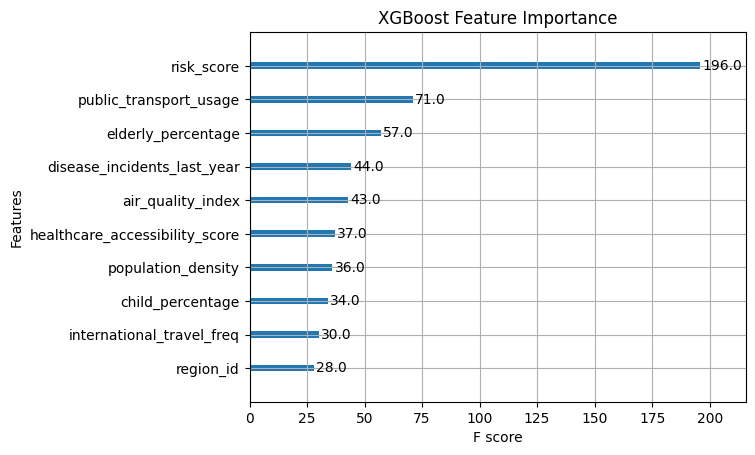

In [75]:
#  Random Forest Feature Importance
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb

rf_feature_importance = pd.Series(rf_model.feature_importances_, index=X_classification.columns).sort_values(ascending=False)
print("Random Forest Feature Importance:")
print(rf_feature_importance)

# Plot feature importance
rf_feature_importance.plot(kind='bar', figsize=(10, 5), title="Random Forest Feature Importance")
plt.show()

# XGBoost Feature Importance
xgb.plot_importance(xgb_model, importance_type='weight', max_num_features=10, title="XGBoost Feature Importance")
plt.show()


In [76]:
# Summarize evaluation metrics for all models
print("Model Comparison:")
print(f"Random Forest - ROC-AUC: {roc_auc_rf:.2f}")
print(f"XGBoost       - ROC-AUC: {roc_auc_xgb:.2f}")
print(f"Neural Net    - ROC-AUC: {roc_auc_nn:.2f}")

Model Comparison:
Random Forest - ROC-AUC: 1.00
XGBoost       - ROC-AUC: 1.00
Neural Net    - ROC-AUC: 0.49


Baseline Model Accuracy: 0.945

Classification Report for Baseline Model:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      1890
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00       109

    accuracy                           0.94      2000
   macro avg       0.32      0.33      0.32      2000
weighted avg       0.89      0.94      0.92      2000



C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Prec

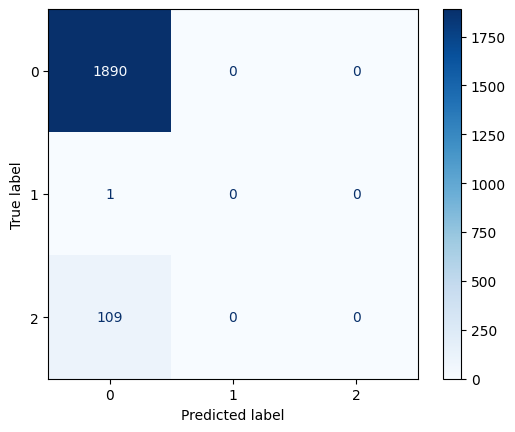

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Instantiate and train a baseline model (Logistic Regression)
baseline_model = LogisticRegression(max_iter=20, random_state=42)
baseline_model.fit(X_train, y_train)

# Evaluate the model
y_pred_baseline = baseline_model.predict(X_test)
print("Baseline Model Accuracy:", accuracy_score(y_test, y_pred_baseline))
print("\nClassification Report for Baseline Model:\n", classification_report(y_test, y_pred_baseline))

ConfusionMatrixDisplay.from_estimator(baseline_model, X_test, y_test, cmap='Blues')

### Clustering for Risk Levels
- For clustering, we will use K-Means clustering to group regions based on their risk factors. The number of clusters (e.g., k) can be determined using the elbow method.

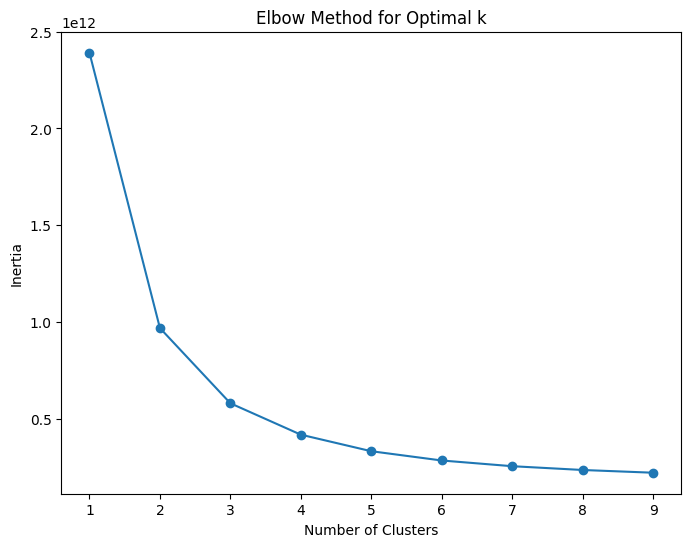

cluster
2    4591
1    2786
0    2623
Name: count, dtype: int64


In [78]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Define features for clustering
X_clustering = data.drop(columns=[classification_target])

# Elbow method to find optimal k
inertia = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_clustering)
    inertia.append(kmeans.inertia_)

# Plotting the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(K, inertia, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

# Assuming optimal k = 3 (based on the elbow plot)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['cluster'] = kmeans.fit_predict(X_clustering)

print(data['cluster'].value_counts())


### Evaluate and Visualize Clusters
- Once clustering is done, visualize the clusters using PCA or t-SNE for dimensionality reduction.

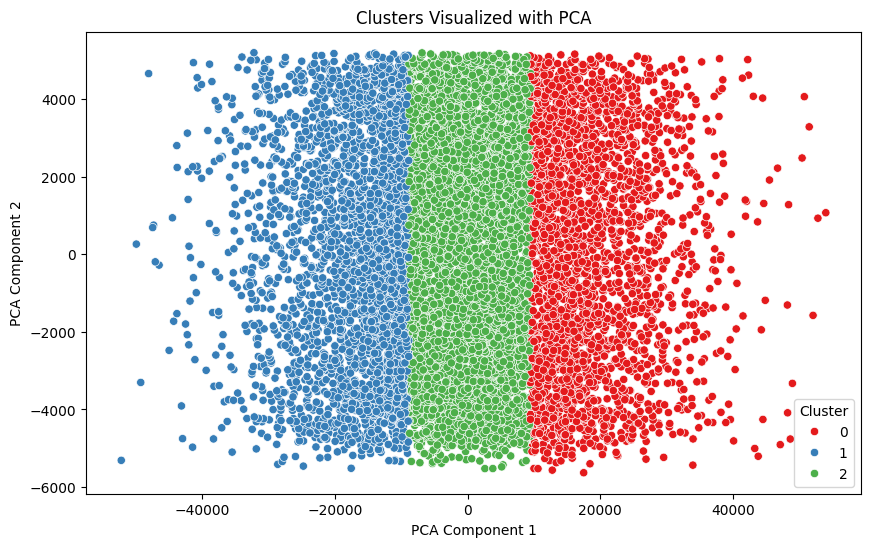

In [79]:
from sklearn.decomposition import PCA
import seaborn as sns

# Reduce dimensions to 2 for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_clustering)

# Add PCA components to the data
data['pca1'] = X_pca[:, 0]
data['pca2'] = X_pca[:, 1]

# Scatter plot of clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='pca1', y='pca2', hue='cluster', data=data, palette='Set1')
plt.title("Clusters Visualized with PCA")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()


### Insights and Interpretations
#### Classification Insights:

- Evaluate feature importance from the Random Forest classifier to determine which factors most impact disease outbreak risk.

In [80]:
importances = rf_model.feature_importances_
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)

print("Feature Importance:")
print(feature_importance_df)

Feature Importance:
                           Feature  Importance
18                      risk_score    0.704003
16       international_travel_freq    0.044386
11               air_quality_index    0.041693
9                     avg_humidity    0.027086
13       outbreak_frequency_5years    0.027069
20              humidity_deviation    0.025789
17          public_transport_usage    0.017105
7   healthcare_accessibility_score    0.014293
15       daily_commuter_percentage    0.011109
3               elderly_percentage    0.007808
8                  avg_temperature    0.007302
6                 vaccination_rate    0.007166
4                 child_percentage    0.006785
22             non_vaccinated_rate    0.006684
19           temperature_deviation    0.006514
1               population_density    0.006098
0                        region_id    0.006005
21          population_density_log    0.006004
2                    median_income    0.005936
5               hospitals_per_100k    0.

In [81]:
cluster_summary = data.groupby('cluster').mean()
print(cluster_summary)

           region_id  population_density  median_income  elderly_percentage  \
cluster                                                                       
0        5025.249714         2301.943244   68655.792067           19.911566   
1        5006.986719         2371.720791   32037.187896           19.952634   
2        4980.245045         2335.981721   50251.590497           20.050305   

         child_percentage  hospitals_per_100k  vaccination_rate  \
cluster                                                           
0               19.959195            2.311289          0.683516   
1               20.046496            2.329088          0.684652   
2               19.979292            2.317060          0.685795   

         healthcare_accessibility_score  avg_temperature  avg_humidity  ...  \
cluster                                                                 ...   
0                              0.649868        20.012095     54.995944  ...   
1                              

In [82]:
print("Class distribution in training data:")
print(y_train.value_counts())

print("Class distribution in test data:")
print(y_test.value_counts())

Class distribution in training data:
outbreak_risk_category_encoded
0    7565
2     429
1       6
Name: count, dtype: int64
Class distribution in test data:
outbreak_risk_category_encoded
0    1890
2     109
1       1
Name: count, dtype: int64


In [83]:
# from imblearn.over_sampling import RandomOverSampler

# oversampler = RandomOverSampler(random_state=42)
# X_train_balanced, y_train_balanced = oversampler.fit_resample(X_train, y_train)
# print("Class distribution after oversampling:")
# print(pd.Series(y_train_balanced).value_counts())

In [84]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)
print(pd.Series(y_train_balanced).value_counts())

outbreak_risk_category_encoded
2    7565
0    7565
1    7565
Name: count, dtype: int64


In [85]:
X_train, X_test, y_train, y_test = train_test_split(X_train_balanced, y_train_balanced, test_size=0.2, random_state=42)

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

Training set shape: (18156, 24)
Test set shape: (4539, 24)


In [86]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))

model.add(Dense(len(np.unique(y_train_balanced)), activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1) 

Epoch 1/50


C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


568/568 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4251 - loss: 256.8351 - val_accuracy: 0.4221 - val_loss: 27.7118
Epoch 2/50
568/568 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5690 - loss: 15.1231 - val_accuracy: 0.7237 - val_loss: 2.1959
Epoch 3/50
568/568 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6310 - loss: 8.5284 - val_accuracy: 0.6788 - val_loss: 4.8108
Epoch 4/50
568/568 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6322 - loss: 7.0315 - val_accuracy: 0.8211 - val_loss: 1.5290
Epoch 5/50
568/568 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7145 - loss: 3.5669 - val_accuracy: 0.7211 - val_loss: 3.2563
Epoch 6/50
568/568 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6869 - loss: 4.9455 - val_accuracy: 0.6704 - val_loss: 6.5809
Epoch 7/50
568/568 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6811 - loss: 4.4286 - val_accuracy: 0.7312 - val_loss: 1.2186
Epoch 8/50
568/568 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6970 - loss: 4.2560 - val_accuracy: 0.8517 - 

In [87]:
print(data)

      region_id  population_density  median_income  elderly_percentage  \
0           0.0         1926.071460   59715.328072           13.120373   
1           1.0         1099.791458   46234.340479           22.367720   
2           2.0         5961.415281   62338.173682           16.234222   
3           3.0          274.449145   56912.244502           22.140685   
4           4.0          643.115175   72034.119281           23.318447   
...         ...                 ...            ...                 ...   
9995     9995.0          604.578638   69777.578677           20.999746   
9996     9996.0         1742.541805   32361.655154           10.700479   
9997     9997.0          409.219976   44412.254477           10.307170   
9998     9998.0          130.823003   43109.431704           26.163805   
9999     9999.0          143.175027   66136.610363           19.245840   

      child_percentage  hospitals_per_100k  vaccination_rate  \
0            16.559945            1.587125     

In [88]:
import geopandas as gpd
import folium
from folium.plugins import HeatMap
import pandas as pd

coordinates = {
    0: {'latitude': 12.9716, 'longitude': 77.5946}, #Banglore
    1: {'latitude': 13.0827, 'longitude': 80.2707},  # Chennai
    2: {'latitude': 25.0961, 'longitude': 85.3131}   # Bihar
}

data['latitude'] = data['region_type_encoded'].map(lambda x: coordinates[x]['latitude'])
data['longitude'] = data['region_type_encoded'].map(lambda x: coordinates[x]['longitude'])

print(data[['region_type_encoded', 'latitude', 'longitude']])
print(data[['latitude', 'longitude']])

map_center = [data['latitude'].mean(), data['longitude'].mean()]  # Adjust as needed
heat_map = folium.Map(location=map_center, zoom_start=6)

heat_data = data[['latitude', 'longitude', 'risk_score']].dropna()
heat_points = heat_data[['latitude', 'longitude', 'risk_score']].values.tolist()

HeatMap(heat_points, radius=15, blur=10, max_zoom=1).add_to(heat_map)

heat_map.save("heatmap_risk_profiles.html")
heat_map


      region_type_encoded  latitude  longitude
0                       0   12.9716    77.5946
1                       0   12.9716    77.5946
2                       2   25.0961    85.3131
3                       1   13.0827    80.2707
4                       0   12.9716    77.5946
...                   ...       ...        ...
9995                    0   12.9716    77.5946
9996                    0   12.9716    77.5946
9997                    1   13.0827    80.2707
9998                    1   13.0827    80.2707
9999                    1   13.0827    80.2707

[10000 rows x 3 columns]
      latitude  longitude
0      12.9716    77.5946
1      12.9716    77.5946
2      25.0961    85.3131
3      13.0827    80.2707
4      12.9716    77.5946
...        ...        ...
9995   12.9716    77.5946
9996   12.9716    77.5946
9997   13.0827    80.2707
9998   13.0827    80.2707
9999   13.0827    80.2707

[10000 rows x 2 columns]


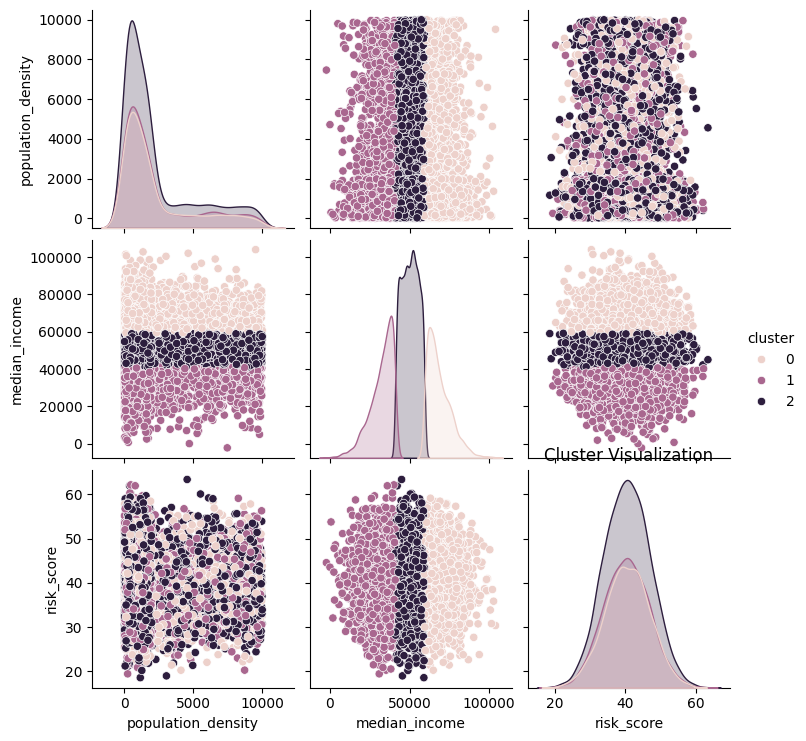

Cluster Means:
            region_id  population_density  median_income  elderly_percentage  \
cluster                                                                       
0        5025.249714         2301.943244   68655.792067           19.911566   
1        5006.986719         2371.720791   32037.187896           19.952634   
2        4980.245045         2335.981721   50251.590497           20.050305   

         child_percentage  hospitals_per_100k  vaccination_rate  \
cluster                                                           
0               19.959195            2.311289          0.683516   
1               20.046496            2.329088          0.684652   
2               19.979292            2.317060          0.685795   

         healthcare_accessibility_score  avg_temperature  avg_humidity  ...  \
cluster                                                                 ...   
0                              0.649868        20.012095     54.995944  ...   
1              

In [89]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant columns for clustering
features = data[['population_density', 'median_income', 'elderly_percentage', 
               'healthcare_accessibility_score', 'vaccination_rate', 'risk_score']].dropna()

# Scale the data for clustering
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Perform KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Add cluster labels to the dataframe
df['cluster'] = clusters

# Visualize clusters
sns.pairplot(data, hue='cluster', vars=['population_density', 'median_income', 'risk_score'])
plt.title("Cluster Visualization")
plt.show()

# Analyze variables influencing each cluster
cluster_means = data.groupby('cluster').mean()
print("Cluster Means:\n", cluster_means)


In [90]:
from sklearn.neighbors import KNeighborsClassifier
knClassifier = KNeighborsClassifier(n_neighbors = 5)
knClassifier.fit(X_train, y_train)

# Make predictions and evaluate
y_pred_gb = knClassifier.predict(X_test)
print(f"KNeighborsClassifier Accuracy: {accuracy_score(y_test, y_pred_gb)}")
print(classification_report(y_test, y_pred_gb))

KNeighborsClassifier Accuracy: 0.8794888742013659
              precision    recall  f1-score   support

           0       0.94      0.69      0.80      1535
           1       0.96      1.00      0.98      1509
           2       0.77      0.95      0.85      1495

    accuracy                           0.88      4539
   macro avg       0.89      0.88      0.88      4539
weighted avg       0.89      0.88      0.88      4539



In [91]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Hyperparameter tuning with GridSearchCV
param_grid = {
    'n_neighbors': range(3, 11),  # Test k values from 3 to 10
    'weights': ['uniform', 'distance'],  # Uniform or distance-based weighting
    'metric': ['euclidean', 'manhattan', 'minkowski']  # Different distance metrics
}

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Best parameters and model
best_knn = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")

# Evaluate on the test set
y_pred = best_knn.predict(X_test_scaled)
print(f"KNeighborsClassifier Accuracy (Best): {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

# Cross-Validation for Robust Accuracy
cv_scores = cross_val_score(best_knn, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy: {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}")

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 4, 'weights': 'uniform'}
KNeighborsClassifier Accuracy (Best): 0.9592421238158184
              precision    recall  f1-score   support

           0       1.00      0.88      0.94      1535
           1       1.00      1.00      1.00      1509
           2       0.89      1.00      0.94      1495

    accuracy                           0.96      4539
   macro avg       0.96      0.96      0.96      4539
weighted avg       0.96      0.96      0.96      4539

Cross-Validation Accuracy: 0.9544 ± 0.0022


In [92]:
import joblib

# Save the model using joblib
model_filename = 'knn_model.pkl'
joblib.dump(best_knn, model_filename)

# Save the scaler too if you want to apply the same scaling to future data
scaler_filename = 'scaler.pkl'
joblib.dump(scaler, scaler_filename)

print(f"Model and scaler saved as {model_filename} and {scaler_filename}.")

Model and scaler saved as knn_model.pkl and scaler.pkl.
